# Workshop: Olympic Medals

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1920px-Olympic_rings_without_rims.png" width=300>

First clone the repository at [https://github.com/daniprec/BAM-Coding-Lab](https://github.com/daniprec/BAM-Coding-Lab)

You will find the data inside `data/olympics`.


---

In [1]:
import matplotlib.pyplot as plt

from olympics import load_and_preprocess

In [2]:
# Use our function to load and preprocess the data
df = load_and_preprocess(path_csv="../data/olympics/olympics_medals.csv")

## 🔢 Counting Unique Values

**Exercise:** Find how many sport events there are. Ignore gender, i.e. "Football, Men" and "Football, Women" count only as one.

In [3]:
print(df["event_simple"].value_counts())

event_simple
Football                            9385
Ice Hockey                          6751
Hockey                              6333
Singles                             6028
Individual                          5528
                                    ... 
Lightweight Coxless Pairs, Mixed       2
Ball Throw for Accuracy                1
Special Scratch Pole Vault #1          1
Aeronautics, Open                      1
Retrieval by Hook                      1
Name: count, Length: 553, dtype: int64


**Exercise:** Find the athlete with the most medals. How many do they have?

In [4]:
mask_medal = df["medal"] != "No"
medal_by_athletes = df.loc[mask_medal, "athlete"].value_counts()
top_athlete = medal_by_athletes.idxmax()

print(f"Top athlete is {top_athlete} with {medal_by_athletes[top_athlete]}")

Top athlete is Michael Phelps with 28


**Exercise:** Compute the number of gold medals won by each country in total. Make a bar plot with the top 10 countries.

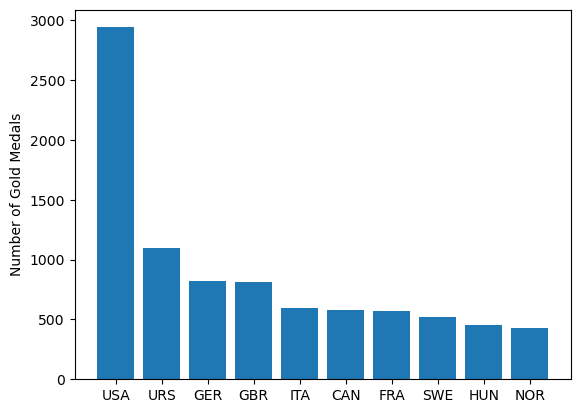

In [5]:
mask_gold = df["medal"] == "Gold"
gold_by_country = df.loc[mask_gold, "country_noc"].value_counts()

plt.bar(gold_by_country.index[:10], gold_by_country.values[:10])
plt.ylabel("Number of Gold Medals")
plt.show()
plt.close()

**Exercise:** Compute the number of gold medals won by each country in 2020. Make a bar plot with the top 10 countries.

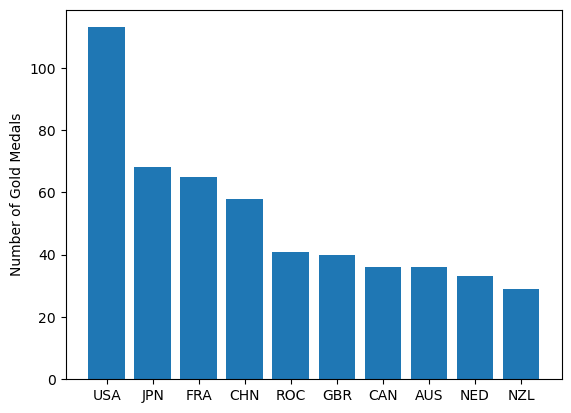

In [6]:
mask_gold = df["medal"] == "Gold"
mask_year = df["year"] == 2020
gold_by_country = df.loc[mask_gold & mask_year, "country_noc"].value_counts()

plt.bar(gold_by_country.index[:10], gold_by_country.values[:10])
plt.ylabel("Number of Gold Medals")
plt.show()
plt.close()

Wait... according to [official sources](https://en.wikipedia.org/wiki/United_States_at_the_2020_Summer_Olympics), USA won 39 gold medals in 2020. Why are we counting 113?

The answer is team sports are only counted **once**, not per athlete!

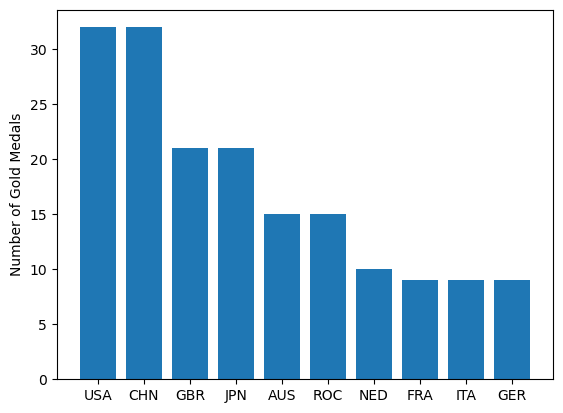

In [7]:
mask_gold = df["medal"] == "Gold"
mask_year = df["year"] == 2020

# We have to count unique combinations of "country_noc" and "event_simple"
df_sub = df.loc[mask_gold & mask_year, ["country_noc", "event_simple"]].drop_duplicates()
gold_by_country = df_sub["country_noc"].value_counts()

plt.bar(gold_by_country.index[:10], gold_by_country.values[:10])
plt.ylabel("Number of Gold Medals")
plt.show()
plt.close()

---

## 👥 Grouping Data by Categories

In [8]:
# Mask non-medal rows
mask_medal = df["medal"] != "No"

# Count unique events per country and year
df_country = df[mask_medal].groupby(["year", "country_noc"], as_index=False)["event"].nunique()
# Rename "event_simple" to "medals"
df_country = df_country.rename(columns={"event": "medals"})

df_country.head(5)

,year,country_noc,medals
0,1896,AUS,3
1,1896,AUT,5
2,1896,DEN,6
3,1896,FRA,8
4,1896,GBR,8


In [9]:
# Lets see the medals earned by the USA in the last 5 years
mask_usa = df_country["country_noc"] == "USA"
df_usa = df_country[mask_usa]

df_usa.tail(5)

,year,country_noc,medals
1329,2014,USA,20
1412,2016,USA,105
1445,2018,USA,18
1536,2020,USA,101
1567,2022,USA,22


Wait... according to [official sources](https://en.wikipedia.org/wiki/United_States_at_the_2020_Summer_Olympics), USA won 113 gold medals in 2020. Why are we counting 101?

That is because we are counting one medal max per event. Sometimes a country can win gold, silver and bronze in the same event!

In [10]:
# Mask non-medal rows
mask_medal = df["medal"] != "No"

# Count unique events per country and year
df_country = df[mask_medal].groupby(["year", "country_noc", "medal"], as_index=False)["event"].nunique()
# Rename "event_simple" to "medals"
df_country = df_country.rename(columns={"event": "medals"})

df_country.head(5)

,year,country_noc,medal,medals
0,1896,AUS,Bronze,1
1,1896,AUS,Gold,2
2,1896,AUT,Bronze,2
3,1896,AUT,Gold,2
4,1896,AUT,Silver,1


In [11]:
# Now we can add all kind of medals together
df_country = df_country.groupby(["year", "country_noc"], as_index=False)["medals"].sum()

# Lets see the medals earned by the USA in the last 5 years
mask_usa = df_country["country_noc"] == "USA"
df_usa = df_country[mask_usa]

df_usa.tail(5)

,year,country_noc,medals
1329,2014,USA,26
1412,2016,USA,120
1445,2018,USA,21
1536,2020,USA,112
1567,2022,USA,25


<div style="color: red">
<strong>Challenge:</strong> One medal is still missing, though the count is getting closer. Can we figure out why this is happening?

This issue extends beyond just the USA - many other countries may have a different medal count than what we are getting!
</div>


---

## 🛠️ Building a Pipeline Script

Next, let’s extend your `olympics.py` script. Create a new function called `count_medals()` that will:

- Take as input the dataframe processed by `load_and_preprocess()`.
- Compute the total number of medals each country has won per year.
- Return a new dataframe summarizing the medal counts by country and year.

---

## 💡 Extra Exercises

**Exercise:** Plot a graph that shows the number of different sport events per year. Make a distinction between Summer and Winter olympics (and any other kind if any).

In [12]:
events_per_year = df.groupby(["year", "season"], as_index=False)["event_simple"].nunique()

events_per_year.head(5)

,year,season,event_simple
0,1896,Summer,39
1,1900,Summer,147
2,1904,Summer,120
3,1906,Intercalated,12
4,1908,Summer,82


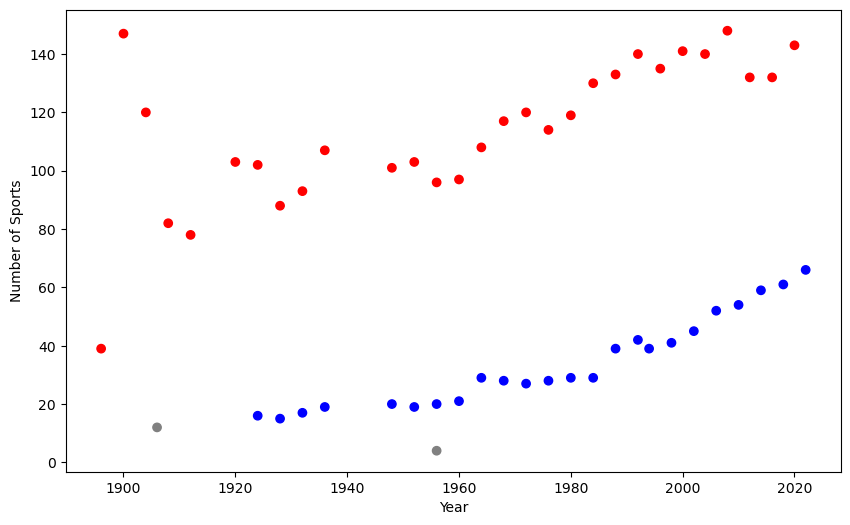

In [13]:
# Color by season
def color_season(season: str) -> str:
  if season.lower() == "summer":
    return "red"
  elif season.lower() == "winter":
    return "blue"
  else:
    return "gray"

# Create a scatter plot
color = events_per_year["season"].map(color_season)

plt.figure(figsize=(10, 6))
plt.scatter(events_per_year["year"], events_per_year["event_simple"], c=color)
plt.xlabel("Year")
plt.ylabel("Number of Sports")
plt.show()

---

We will now create a new dataframe containing the total number of medals gained by country per year.